<a href="https://colab.research.google.com/github/learner0408/Cataract-Detection/blob/Projects/CD_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Image Data Generator 

In [ ]:
# Importing Libraries
import tensorflow as tf
import keras
from keras_preprocessing import image
from keras.preprocessing.image import  ImageDataGenerator ,array_to_img,img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io, os

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from keras.regularizers import L1L2
from keras import models
from keras import layers
from keras import optimizers



In [ ]:
# Uploading files
#from google.colab import files
#uploaded = files.upload()

 # Uploading files from drive (For permanent use)
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
# iter = datagen.flow(inBatch, batch_size=1)#flow method returns an iterator  

# # generate samples and plot
# fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(15,15))

# # generate batch of images
# for i in range(10):

# 	# convert to unsigned integers
# 	image = next(iter)[0].astype('uint8')
 
# 	# plot image
# 	ax[i].imshow(image)
# 	ax[i].axis('off')

In [ ]:
dataRoot='/content/gdrive/MyDrive/Img'


In [ ]:
# Creating ImageDataGenerator for preprocessing and importing data into model
imageShape = (100, 100)
trainingDataDir = str(dataRoot)
#print(trainingDataDir);
datagen_kwargs = dict(rescale=1./255, validation_split=.50,rotation_range=35, width_shift_range=0.2,
    )

valid_datagen = ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
trainingDataDir,
subset="validation",
shuffle=True,
target_size=imageShape
)
train_datagen = ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
trainingDataDir,
subset="training",
shuffle=True,
target_size=imageShape)

/content/gdrive/MyDrive/Img
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:

# iter=train_generator
# image_batch_train = next(iter)[0]
# label_batch_train = next(iter)[1]
# print("Image batch shape: ", image_batch_train.shape)
# print("Label batch shape: ", label_batch_train.shape)
# dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
# dataset_labels = np.array([key.title() for key, value in dataset_labels])
# print(dataset_labels)
# print(train_generator.num_classes)

Image batch shape:  (6, 100, 100, 3)
Label batch shape:  (6, 2)
['Cataract' 'Normal']
2


In [ ]:
# Creating Logistic Regression Model Using CNN
mod = Sequential()
mod.add(tf.keras.Input(shape=(100,100,3,)))
mod.add(Flatten())
mod.add(tf.keras.layers.Dense(2 , activation = 'sigmoid'))
# mod.add(Dense(1,  # output dim is 2, one score per each class
#                 activation='softmax',
#                 kernel_regularizer=L1L2(l1=0.0, l2=0.1),
#                 input_dim=4 # input dimension = number of features your data has
#                 #input_dim=
#                 ) 
#)
mod.build([None, 100, 100, 3])
mod.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Defining Training Batch Size and Validation Batch Size
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
print(steps_per_epoch)
print(val_steps_per_epoch)

1.0
1.0


In [ ]:
# Storing history of model(Accuracy/Loss at different epochs) 
Hist=mod.fit_generator(
                            train_generator,
                            epochs=30,
                            steps_per_epoch=steps_per_epoch,
                            validation_data=valid_generator,
                            validation_steps=val_steps_per_epoch
)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.1672 - accuracy: 0.8333

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1/1 [==============================] - 0s 186ms/step - loss: 0.1672 - accuracy: 0.8333 - val_loss: 1.6480 - val_accuracy: 0.6667
Epoch 2/30
1/1 [==============================] - 0s 114ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 1.8258 - val_accuracy: 0.3333
Epoch 3/30
1/1 [==============================] - 0s 120ms/step - loss: 0.4167 - accuracy: 0.8333 - val_loss: 1.0379 - val_accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 146ms/step - loss: 0.1202 - accuracy: 1.0000 - val_loss: 1.8746 - val_accuracy: 0.6667
Epoch 5/30
1/1 [==============================] - 0s 145ms/step - loss: 0.1208 - accuracy: 1.0000 - val_loss: 1.1301 - val_accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 141ms/step - loss: 0.0650 - accuracy: 1.0000 - val_loss: 0.8717 - val_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 125ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 1.4120 - val_accuracy: 0.6667
Epoch 8/30
1/1 [===============

In [ ]:
# Testing new image from  the learned Logistic Regression Model
test_image = image.load_img('/content/gdrive/MyDrive/Img/Normal/N2.jpg' , target_size = (100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = mod.predict(test_image)
train_generator.class_indices
if result[0][0] == 0:
    prediction = 'normal'
  
else:
    prediction = 'cataract'
    

print(prediction)   


normal


In [ ]:
# iter=valid_generator
# val_image_batch= next(iter)[0]
# val_label_batch = next(iter)[1]
# true_label_ids = np.argmax(val_label_batch, axis=-1)
# print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (2, 100, 100, 3)


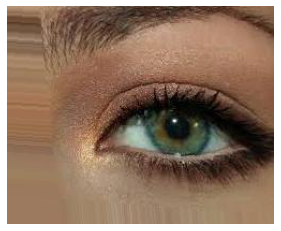

In [ ]:
image=load_img('/content/gdrive/MyDrive/Img/Normal/N2.jpg')
image=img_to_array(image);
x=image/255.0;

plt.imshow(x)
plt.axis('off')
plt.show()


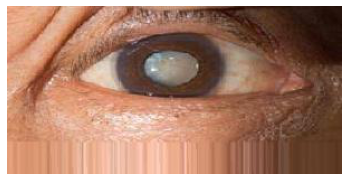

In [ ]:
image=load_img('/content/gdrive/MyDrive/Img/Cataract/C3.jpg')
image=img_to_array(image);
x=image/255.0;

plt.imshow(x)
plt.axis('off')
plt.show()

# **VGG-16**

In [ ]:
# Creating ImageDataGenerator for Preprocessing and using this we can directly import data with labels into the model
trainDataGen = ImageDataGenerator()
trainData = trainDataGen.flow_from_directory(directory= "/content/gdrive/MyDrive/Cataract Detection/CD_Dataset_Krishna/Cataract/Train" , target_size=(224,224))
testDataGen = ImageDataGenerator()
testData = testDataGen.flow_from_directory(directory="/content/gdrive/MyDrive/Cataract Detection/CD_Dataset_Krishna/Cataract/Test",target_size=(224,224))


Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
#Creating VGG-16 CNN model
model = Sequential()

model.add(Conv2D(input_shape= (224,224,3),filters= 64, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(filters= 64, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters= 128, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(filters= 128, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters= 256, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(filters= 256, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(filters= 256, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters= 512, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(filters= 512, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(filters= 512, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters= 512, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(filters= 512, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2D(filters= 512, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(units= 4096, activation='relu'))

model.add(Dense(units=4096 , activation='relu'))

model.add(Dense(units= 2, activation='softmax'))

In [ ]:
# Adding Optimizer and compiling the model
from keras.optimizers import adam_v2
model.compile(optimizer=adam_v2.Adam(lr=0.001),loss= keras.losses.categorical_crossentropy, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Printing Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
# Saving the history of model(Training) in variable hist
hist = model.fit_generator(steps_per_epoch = 100, validation_steps = 20 , generator = trainData, validation_data=testData, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
100/100 [==============================] - 6328s 63s/step - loss: 37.8656 - accuracy: 0.5147 - val_loss: 0.6950 - val_accuracy: 0.5031
Epoch 2/25
100/100 [==============================] - 6210s 62s/step - loss: 0.6924 - accuracy: 0.5277 - val_loss: 0.6946 - val_accuracy: 0.4953
Epoch 3/25
100/100 [==============================] - 6257s 63s/step - loss: 0.6915 - accuracy: 0.5341 - val_loss: 0.6958 - val_accuracy: 0.4812
Epoch 4/25
 76/100 [=====================>........] - ETA: 23:35 - loss: 0.6891 - accuracy: 0.5469

In [ ]:
# Visualizing Training/Validation Accuracy

plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Accuracy and Loss")
plt.xlabel("Accuracy / Loss")
plt.ylabel("Epochs")
plt.legend(["Accuracy", "Validation Accuracy","Loss","Validation Loss"])
plt.show()

# ResNet

#MobileNet


In [ ]:
# Importing Libraries and Functions to used in MobileNet
import tensorflow as tf
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
#from tf.keras.applications import MobileNetV2

In [ ]:
BatchSize = 32
ImgSize = (160,160)

# Creating Image Data Generator with Data Augmentation
trainGen = ImageDataGenerator(horizontal_flip=True, vertical_flip = True, rotation_range = 30, validation_split=0.2)
trainData = trainGen.flow_from_directory(directory= "/content/gdrive/MyDrive/Cataract Detection/CD_Dataset_Krishna/Cataract/Train",  batch_size=BatchSize, target_size=ImgSize)
testGen = ImageDataGenerator()
testData = testGen.flow_from_directory(directory= "/content/gdrive/MyDrive/Cataract Detection/CD_Dataset_Krishna/Cataract/Test" , target_size=ImgSize)

Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
# Creating Base Model from pre-trained MobileNetV2
# Here we have dpecified the input shape because the pre-trained model works best for the suitable parameters mentioned in the original model
# We have not included the top layers of the model(include_top=False) because in our case we have to do classification among two classes(Cataract and Normal), while the pre-trained model had to do classification among 1000 classes 
InputShape = (160,160,3) 
baseModel = tf.keras.applications.MobileNetV2(input_shape = InputShape, include_top=False, weights = 'imagenet')

#Specifying that base model parameters are not trainable
baseModel.trainable = False

In [ ]:
baseModel.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_5[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
# Converting images into block of features 
# This will be used to create the top layers of the final model
images,labels = next(iter(trainData))
featureBatch = baseModel(images)
featureBatch.shape

TensorShape([32, 5, 5, 1280])

In [ ]:
# GlobalAveragePoolingLayer to convert Feature into 1280 element vector
globalAvgLayer = tf.keras.layers.GlobalAveragePooling2D()
featureBatchAvg = globalAvgLayer(featureBatch)
print(featureBatchAvg.shape)

# Dense layer for final prediction
predLayer = tf.keras.layers.Dense(1)
predBatch = predLayer(featureBatchAvg)
print(predBatch.shape)

(32, 1280)
(32, 1)


In [ ]:
# Building final model by combining Preprocessing, base models and the top layers
inputs = tf.keras.Input(shape = (160,160,3))
x = preprocess_input(inputs)
x = baseModel(x)
x = globalAvgLayer(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = predLayer(x)
model = tf.keras.Model(inputs,output)

In [ ]:
# Compiling Model
lr = 0.001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr),loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics = ["accuracy"])

#Printing Model Summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

In [ ]:
# Loss and Accuracy before Training
loss0 , accuracy0 = model.evaluate(testData)

50/50 [==============================] - 570s 12s/step - loss: 0.7998 - accuracy: 0.5000


In [ ]:
# Training Model
epochs = 10
history = model.fit(trainData, validation_data=testData , epochs = epochs)

Epoch 1/10
 78/253 [========>.....................] - ETA: 33:28 - loss: 0.7786 - accuracy: 0.5000

KeyboardInterrupt: ignored